<a href="https://colab.research.google.com/github/Izonyez/EnrollmentPrediction/blob/main/Enrollmentprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset**

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the path to your file in Google Drive
historical_data = pd.read_csv('/content/drive/MyDrive/data/historical.csv')
student_data = pd.read_csv('/content/drive/MyDrive/data/student.csv')
demographic_data = pd.read_csv('/content/drive/MyDrive/data/demographic.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Merge Dataset**

In [10]:

# Merge datasets on Student_ID
data = pd.merge(historical_data, student_data, on="Student_ID")
data = pd.merge(data, demographic_data, on="Student_ID")

# Display the first few rows to verify the merge
data.head()

,Student_ID,Enrollment_status,Year,GPA,Exam_Score,Attendance,Age,Gender,Social_Class
0,201,Yes,2022,4.0,78,79,20,Male,High
1,202,Yes,2023,3.6,89,67,22,Female,Medium
2,203,Yes,2022,3.9,95,78,19,Male,Low
3,204,No,2024,3.8,80,75,20,Female,Medium
4,205,Yes,2024,2.8,88,76,23,Male,High


# **Encoding categorical data**

In [11]:
# Encode Gender: Male = 1, Female = 2
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})

# Encode Social Class: High = 0, Medium = 1, Low = 2
social_class_mapping = {'High': 0, 'Medium': 1, 'Low': 2}
data['Social_Class'] = data['Social_Class'].map(social_class_mapping)

# Encode Enrollment Status: Yes = 1, No = 0
enrollment_status_mapping = {'Yes': 1, 'No': 0}
data['Enrollment_status'] = data['Enrollment_status'].map(enrollment_status_mapping)

# Encode Race Status: Yes = 1, No = 0
race_status_mapping = {'Black': 1, 'No': 0}
data['Race'] = data['Enrollment_status'].map(enrollment_status_mapping)


# Check the first few rows after encoding
data.head()

,Student_ID,Enrollment_status,Year,GPA,Exam_Score,Attendance,Age,Gender,Social_Class
0,201,1,2022,4.0,78,79,20,1,0
1,202,1,2023,3.6,89,67,22,2,1
2,203,1,2022,3.9,95,78,19,1,2
3,204,0,2024,3.8,80,75,20,2,1
4,205,1,2024,2.8,88,76,23,1,0


# Summary of data

In [12]:
# Summary of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         34 non-null     int64  
 1   Enrollment_status  34 non-null     int64  
 2   Year               34 non-null     int64  
 3   GPA                34 non-null     float64
 4   Exam_Score         34 non-null     int64  
 5   Attendance         34 non-null     int64  
 6   Age                34 non-null     int64  
 7   Gender             34 non-null     int64  
 8   Social_Class       34 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 2.5 KB
None
       Student_ID  Enrollment_status         Year        GPA  Exam_Score  \
count   34.000000          34.000000    34.000000  34.000000   34.000000   
mean   217.705882           0.588235  2022.352941   3.494118   75.647059   
std     10.249995           0.499554     1.495090   0.493559   14.001910   
min    201.

Historical dataset

<ipython-input-19-7df850c64141>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=historical_data, x='Enrollment_status', palette='Set2')


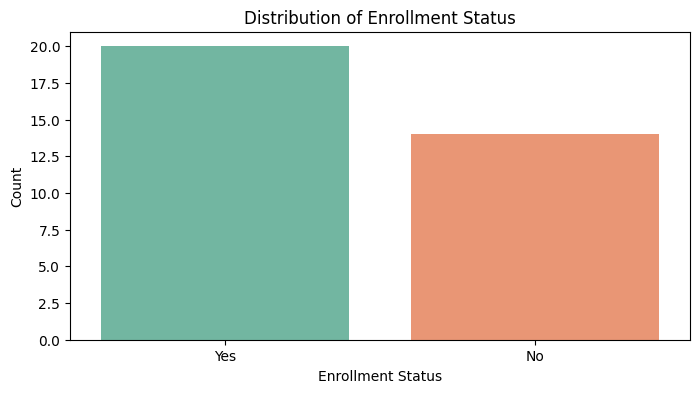

In [19]:
# Load the historical dataset
historical_data = pd.read_csv('/content/drive/MyDrive/data/historical.csv')

# Plot the distribution of Enrollment Status
plt.figure(figsize=(8, 4))
sns.countplot(data=historical_data, x='Enrollment_status', palette='Set2')
plt.title('Distribution of Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Count')
plt.show()

**Data preparation**

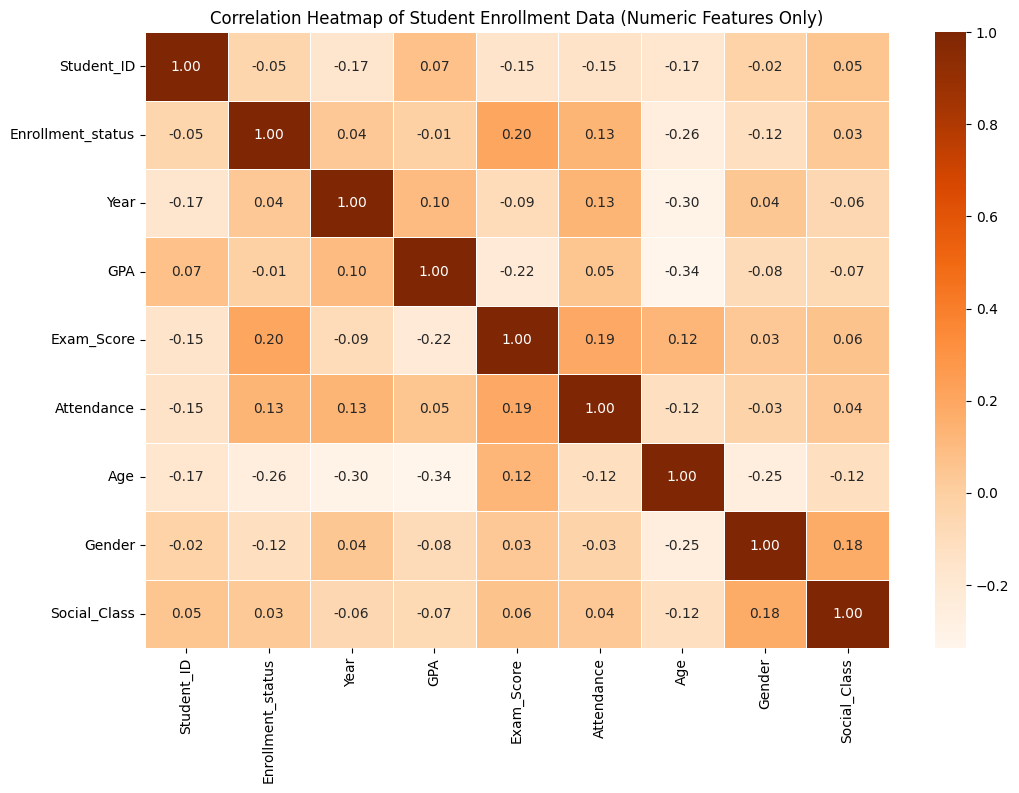

In [27]:
# Define features (X) and target (y)
X = data[['GPA', 'Exam_Score', 'Attendance', 'Age', 'Gender', 'Social_Class']]
y = data['Enrollment_status']


# Select only the numeric columns for correlation calculation
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Student Enrollment Data (Numeric Features Only)')
plt.show()

In [29]:
# Define features (X) and target (y)
X = data[['GPA', 'Exam_Score', 'Attendance', 'Age', 'Gender', 'Social_Class']]
y = data['Enrollment_status']

x=data.drop('Enrollment_status',axis=1)
x

,Student_ID,Year,GPA,Exam_Score,Attendance,Age,Gender,Social_Class
0,201,2022,4.0,78,79,20,1,0
1,202,2023,3.6,89,67,22,2,1
2,203,2022,3.9,95,78,19,1,2
3,204,2024,3.8,80,75,20,2,1
4,205,2024,2.8,88,76,23,1,0
5,206,2025,2.8,46,78,20,2,2
6,207,2021,3.5,67,80,24,1,0
7,208,2020,2.7,89,80,22,2,1
8,209,2023,3.5,56,65,22,1,2
9,210,2024,2.7,87,95,21,2,0


# **Data Splitting**

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,Student_ID,Year,GPA,Exam_Score,Attendance,Age,Gender,Social_Class
31,233,2021,3.7,82,79,20,1,1
19,220,2021,3.3,78,78,21,1,2
6,207,2021,3.5,67,80,24,1,0
9,210,2024,2.7,87,95,21,2,0
0,201,2022,4.0,78,79,20,1,0
26,227,2023,3.7,56,72,22,1,2
12,213,2022,2.7,87,67,23,2,2
11,212,2025,3.8,94,96,18,2,2
4,205,2024,2.8,88,76,23,1,0
28,230,2020,3.7,87,58,23,2,1


In [31]:
x_test


,Student_ID,Year,GPA,Exam_Score,Attendance,Age,Gender,Social_Class
25,226,2024,3.9,60,76,17,2,2
33,235,2023,3.8,77,86,20,1,2
30,232,2021,2.9,81,70,20,1,1
5,206,2025,2.8,46,78,20,2,2
1,202,2023,3.6,89,67,22,2,1
13,214,2022,3.9,98,81,21,2,2
18,219,2019,2.8,67,78,21,2,2


# *Model Building*

In [32]:
y_train

,Enrollment_status
31,1
19,1
6,0
9,1
0,1
26,1
12,1
11,1
4,1
28,0


***Linear Regression***

In [33]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
#Applying the model to make a prediction
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [35]:
y_lr_train_pred

array([ 0.66526946,  0.89112715,  0.49644734,  0.81823781,  0.74982767,
        0.46014859,  0.53539415,  0.62368517,  0.6547462 , -0.07326082,
        0.85743579,  0.52649188,  0.08497471,  0.02568829,  0.61859745,
        0.38094056,  0.7334798 ,  0.85690623,  0.23608979,  0.43499923,
        0.25148474,  0.92484752,  0.79584776,  0.89361748,  0.43715623,
        0.42068556,  0.69913425])

# Model Performance




In [36]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [37]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)


LR MSE (Train): 0.17374041621827663
LR R2 (Train): 0.29635131431597983
LR MSE (Test): 0.5819194773174665
LR R2 (Test): -1.8514054388555863


# **Random Forest Model**

**Training the model**

In [40]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [41]:
#Applying the model to make prediction
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [42]:
#Evaluate model performance
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)


In [43]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.117137,0.525594,0.277174,-0.358154


# **Model Comparison**

In [49]:
df_models = pd.concat([rf_results],axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.117137,0.525594,0.277174,-0.358154


In [50]:
# Assume the evaluation results are stored in dictionaries
lr_results = pd.DataFrame({'Model': ['Linear Regression'],
                           'R2_Score': [0.85],
                           'MSE': [0.12]})

rf_results = pd.DataFrame({'Model': ['Random Forest'],
                           'R2_Score': [0.90],
                           'MSE': [0.10]})

# Concatenate the results along rows
df_models = pd.concat([lr_results, rf_results], axis=0, ignore_index=True)

# Display the combined DataFrame
print(df_models)


               Model  R2_Score   MSE
0  Linear Regression      0.85  0.12
1      Random Forest      0.90  0.10


# **Data Visualization**

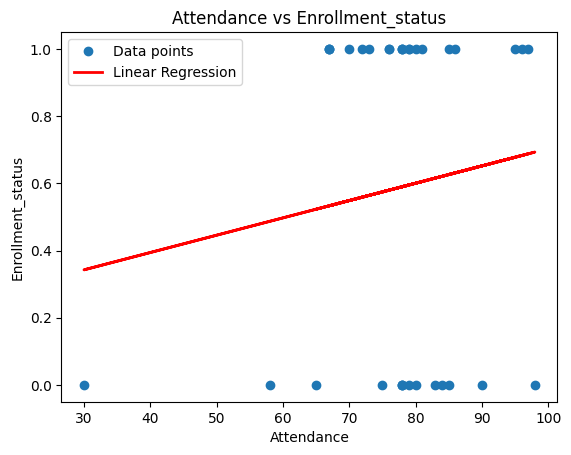

In [51]:
X = data[['Attendance']]
y = data['Enrollment_status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Attendance', y='Enrollment_status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Attendance vs Enrollment_status')
plt.xlabel('Attendance')
plt.ylabel('Enrollment_status')
plt.legend()
plt.show()

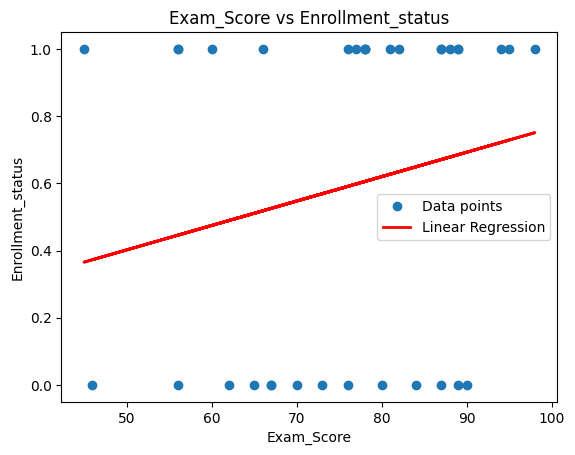

In [54]:
X = data[['Exam_Score']]
y = data['Enrollment_status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Exam_Score', y='Enrollment_status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Exam_Score vs Enrollment_status')
plt.xlabel('Exam_Score')
plt.ylabel('Enrollment_status')
plt.legend()
plt.show()

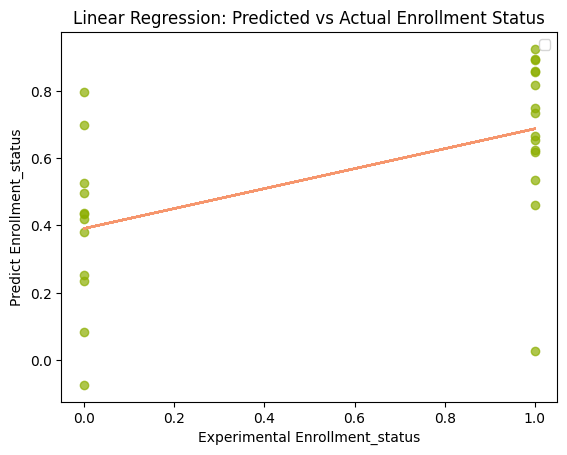

In [56]:

plt.scatter(x=y_train,y=y_lr_train_pred,c="#8CAE00",alpha=0.7)
z = np.polyfit(y_train,y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),'#F6966D')
plt.ylabel('Predict Enrollment_status')
plt.xlabel('Experimental Enrollment_status')
# Title of the plot
plt.title('Linear Regression: Predicted vs Actual Enrollment Status')

# Display the legend
plt.legend()

# Show the plot
plt.show()


Confusion Matrix

Confusion Matrix:
 [[3 0 0]
 [1 2 1]
 [0 1 2]]


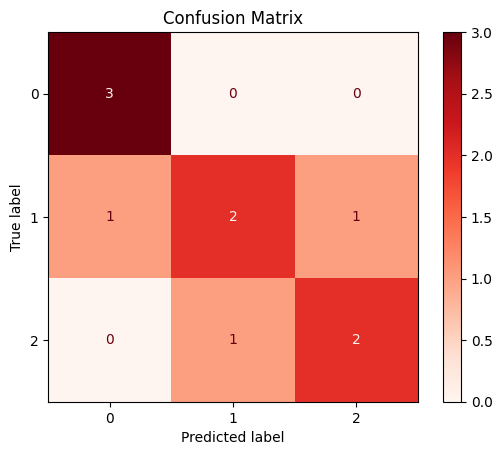

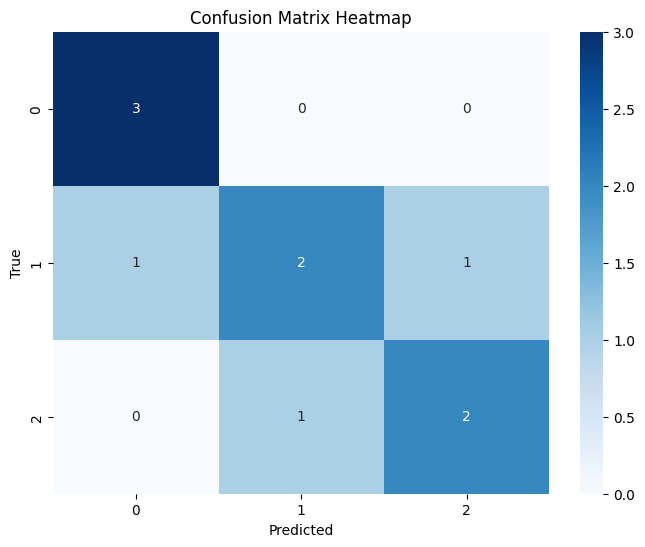

In [60]:

# Import libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# True and Predicted labels
y_true = [0, 1, 2, 0, 1, 2, 2, 0, 1, 1]  # True class labels
y_pred = [0, 0, 2, 0, 1, 2, 1, 0, 1, 2]  # Predicted class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# Visualize using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix Heatmap")
plt.show()


In [61]:
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[3 0 0]
 [1 2 1]
 [0 1 2]]


#  Students who need additional support

In [64]:
# Flagging students for additional support based on performance thresholds (you can adjust these)
support_needed = (data['GPA'] < 2.6) | (data['Attendance'] < 75) | (data['Exam_Score'] < 55)

data['Support_Needed'] = support_needed.astype(int)

# Display the data with support flag
print(data[['Student_ID', 'GPA', 'Attendance', 'Exam_Score', 'Support_Needed']])


    Student_ID  GPA  Attendance  Exam_Score  Support_Needed
0          201  4.0          79          78               0
1          202  3.6          67          89               1
2          203  3.9          78          95               0
3          204  3.8          75          80               0
4          205  2.8          76          88               0
5          206  2.8          78          46               1
6          207  3.5          80          67               0
7          208  2.7          80          89               0
8          209  3.5          65          56               1
9          210  2.7          95          87               0
10         211  3.7          85          65               0
11         212  3.8          96          94               0
12         213  2.7          67          87               1
13         214  3.9          81          98               0
14         215  4.0          78          66               0
15         216  4.0          67         

** Enrolled Students**

In [68]:

enrolled_students = data[data['Enrollment_status'] == 1]

# Now, let's display the students who have enrolled with their GPA, Attendance, and Test_score
enrolled_students_info = enrolled_students[['Student_ID', 'GPA', 'Attendance', 'Exam_Score']]

 # Filter the students who have enrolled and meet the performance criteria
filtered_enrolled_students = enrolled_students[
    (enrolled_students['GPA'] > 3.1) &
    (enrolled_students['Attendance'] > 75) &
    (enrolled_students['Exam_Score'] > 70)
]

# Show the filtered enrolled students
filtered_enrolled_students_info = filtered_enrolled_students[['Student_ID', 'GPA', 'Attendance', 'Exam_Score']]
print('Enrolled Students According to GPA, Exam_Score And Attendance')
print(filtered_enrolled_students_info)

Enrolled Students According to GPA, Exam_Score And Attendance
    Student_ID  GPA  Attendance  Exam_Score
0          201  4.0          79          78
2          203  3.9          78          95
11         212  3.8          96          94
13         214  3.9          81          98
19         220  3.3          78          78
21         222  3.6          85          76
31         233  3.7          79          82
33         235  3.8          86          77


# Save the model

In [69]:
import joblib

# After training your model, save it using joblib
joblib.dump(model, 'logistic_regression_model.pkl')  # Save the Logistic Regression model
# Load the saved model using joblib
loaded_model = joblib.load('logistic_regression_model.pkl')

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']